In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загрузим очищенную выборку

In [6]:
df = pd.read_csv('content/train.csv',index_col='PassengerId')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,Male,22.0,1,0,7.2500,3
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,3
4,1,1,female,35.0,1,0,53.1000,3
5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
887,0,2,Male,27.0,0,0,13.0000,3
888,1,1,female,19.0,0,0,30.0000,3
889,0,3,female,60.0,1,2,23.4500,3


In [7]:
dft = pd.read_csv('content/test.csv',index_col='PassengerId')
dft

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Выполняем очистку тестового набора

In [ ]:
dft.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
dft

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,male,34.5,0,0,7.8292,Q
893,1,3,female,47.0,1,0,7.0000,S
894,0,2,male,62.0,0,0,9.6875,Q
895,0,3,male,27.0,0,0,8.6625,S
896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,0,3,male,NaN,0,0,8.0500,S
1306,1,1,female,39.0,0,0,108.9000,C
1307,0,3,male,38.5,0,0,7.2500,S


In [ ]:
sex_scale={'female':1,'male':0,'Male':0,'Female':1}
emb_scale={'Q':2,'C':1,'S':3,np.nan:1}
df['Embarked'].replace(emb_scale,inplace=True)
dft['Embarked'].replace(emb_scale,inplace=True)
dft['Sex'].replace(sex_scale,inplace=True)
dft.Age=dft.Age.replace(np.nan,28)
dft.Fare=dft.Fare.replace(np.nan,0)
print(dft.isna().sum())
dft

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,0,3,0,34.5,0,0,7.8292,2
893,1,3,1,47.0,1,0,7.0000,3
894,0,2,0,62.0,0,0,9.6875,2
895,0,3,0,27.0,0,0,8.6625,3
896,1,3,1,22.0,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
1305,0,3,0,28.0,0,0,8.0500,3
1306,1,1,1,39.0,0,0,108.9000,1
1307,0,3,0,38.5,0,0,7.2500,3


Склеим наборы

In [ ]:
df=pd.concat([df,dft])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,Male,22.0,1,0,7.2500,3
2,1,1,female,38.0,1,0,71.2833,1
3,1,3,female,26.0,0,0,7.9250,3
4,1,1,female,35.0,1,0,53.1000,3
5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
1305,0,3,0,28.0,0,0,8.0500,3
1306,1,1,1,39.0,0,0,108.9000,1
1307,0,3,0,38.5,0,0,7.2500,3


Проверим пропуски

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Выполним замену признака Пол на числовые значения

In [ ]:
sex_scale={'female':1,'male':0,'Male':0,'Female':1}
df['Sex'].replace(sex_scale,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,3
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,3
4,1,1,1,35.0,1,0,53.1000,3
5,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
1305,0,3,0,28.0,0,0,8.0500,3
1306,1,1,1,39.0,0,0,108.9000,1
1307,0,3,0,38.5,0,0,7.2500,3


Построим матрицу корреляции

<ipython-input-10-b534020cf9ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfc=df.corr().round(2)


<Axes: >

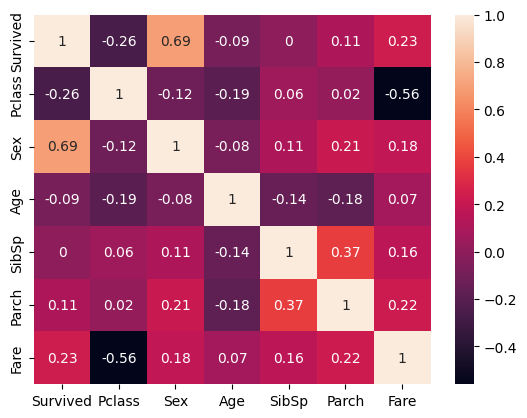

In [ ]:
dfc=df.corr().round(2)
sns.heatmap(data=dfc,annot=True)

Выделим целевой признак

In [ ]:
Y=df['Survived']
Y

PassengerId
1       0
2       1
3       1
4       1
5       0
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 1307, dtype: int64

Остальное - Х

In [ ]:
X=df.drop(['Survived'],axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,3
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,3
4,1,1,35.0,1,0,53.1000,3
5,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
1305,3,0,28.0,0,0,8.0500,3
1306,1,1,39.0,0,0,108.9000,1
1307,3,0,38.5,0,0,7.2500,3


разделим  датасет на train и test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [ ]:
X_train.shape

(1176, 7)

Создадим модель DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(random_state=0)
dtf.fit(X_train,Y_train)
pred_1=dtf.predict(X_test)

Построим матрицу ошибки

In [ ]:
df1=pd.crosstab(Y_test,pred_1)
df1

col_0,0,1
Survived,,
0,76,8
1,15,32


Выполним оценку

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('accuracy',accuracy_score(Y_test,pred_1))
print('precision',precision_score(Y_test,pred_1))
print('recall',recall_score(Y_test,pred_1))

accuracy 0.8244274809160306
precision 0.8
recall 0.6808510638297872


Общий отчёт, проанализируйте результат - требуется доработка!!

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pred_1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        84
           1       0.80      0.68      0.74        47

    accuracy                           0.82       131
   macro avg       0.82      0.79      0.80       131
weighted avg       0.82      0.82      0.82       131



Построим кривые ROC

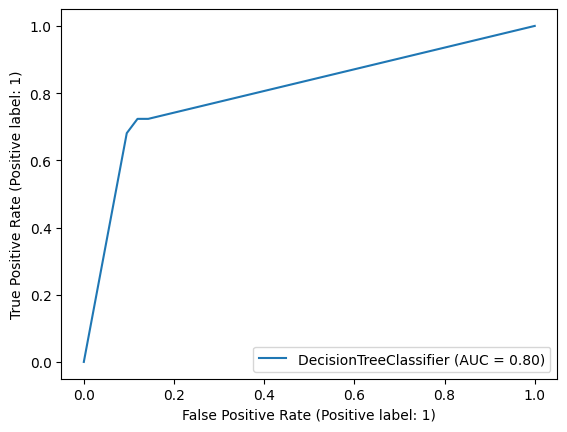

In [ ]:
from sklearn.metrics import RocCurveDisplay
dtf_disp = RocCurveDisplay.from_estimator(dtf, X_test, Y_test)
plt.show()

**Выводим важность признаков в этой модели**

In [ ]:
dtf.feature_importances_

array([0.06064187, 0.49788065, 0.16924894, 0.02386817, 0.02637836,
       0.20814403, 0.01383798])

**Строим дерево**

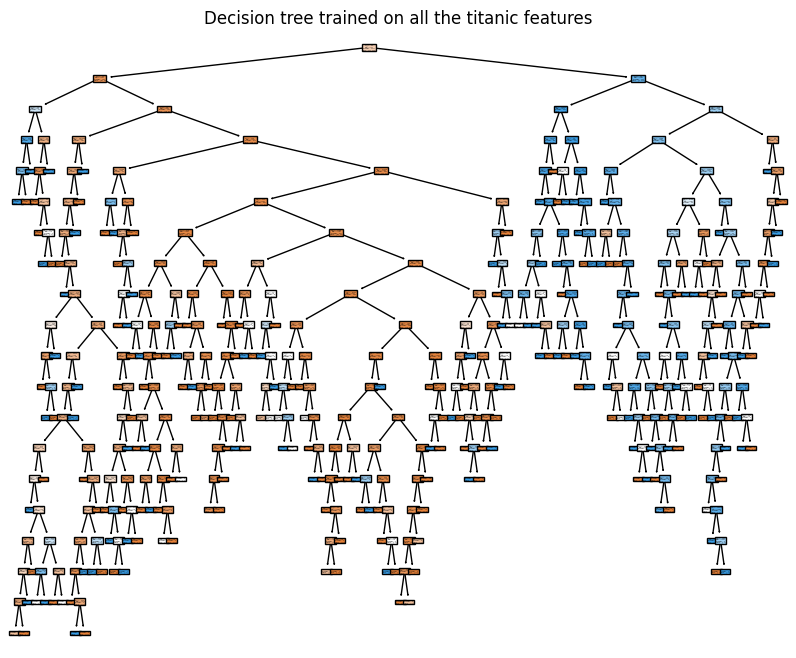

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(dtf, filled=True)
plt.title("Decision tree trained on all the titanic features")
plt.show()

# подберём оптимальные гиперпараметры
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

**Важные параметры:**
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [ ]:
param_grid = {
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
CV_dtf = GridSearchCV(estimator=dtf, param_grid=param_grid, cv= 5)
CV_dtf.fit(X, Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

Узнаем найденные параметры

In [ ]:
CV_dtf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'splitter': 'best'}

In [ ]:
CV_dtf.best_score_

0.8638823082097629

Попробуйте поменять параметр разбиения для перекрёсной проверки cv=10 или cv=12

Постройте модель DecitionTree с найденными оптимальными параметрами: обучите на X_train, проверьте на X_test

In [ ]:
#Ваш код
CV_dtf = GridSearchCV(estimator=dtf, param_grid=param_grid, cv= 10)
CV_dtf.fit(X, Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [ ]:
CV_dtf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'splitter': 'random'}

In [ ]:
CV_dtf.best_score_

0.8671462125660601

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        84
           1       0.89      0.66      0.76        47

    accuracy                           0.85       131
   macro avg       0.86      0.81      0.82       131
weighted avg       0.85      0.85      0.84       131



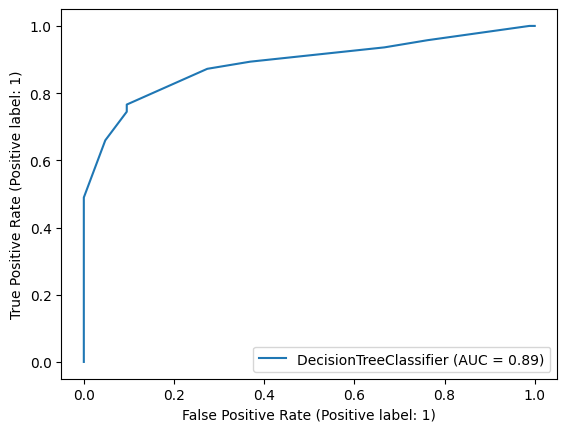

In [ ]:
dtc = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5, max_features=None, splitter='random')
dtc.fit(X_train, Y_train)
pred_1 = dtc.predict(X_test)
print(classification_report(Y_test,pred_1))
dtc_disp = RocCurveDisplay.from_estimator(dtc, X_test, Y_test)
plt.show()

Постройте подобную процедуру ко всем моделям или к 2-м (RandomForest, ...)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(random_state=0)
abc.fit(X_train, Y_train)
pred_3=abc.predict(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train,Y_train)
pred_4=mlp.predict(X_test)

In [ ]:
print('Random forest:\n')
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2))
print(classification_report(Y_test,pred_2))
df2=pd.crosstab(Y_test,pred_2)
df2

Random forest:

accuracy 0.8320610687022901
precision 0.8205128205128205
recall 0.6808510638297872
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        84
           1       0.82      0.68      0.74        47

    accuracy                           0.83       131
   macro avg       0.83      0.80      0.81       131
weighted avg       0.83      0.83      0.83       131



col_0,0,1
Survived,,
0,77,7
1,15,32


In [ ]:
print('Adaboost:\n')
print('accuracy',accuracy_score(Y_test,pred_3))
print('precision',precision_score(Y_test,pred_3))
print('recall',recall_score(Y_test,pred_3))
print(classification_report(Y_test,pred_3))
df3=pd.crosstab(Y_test,pred_3)
df3

Adaboost:

accuracy 0.8396946564885496
precision 0.825
recall 0.7021276595744681
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        84
           1       0.82      0.70      0.76        47

    accuracy                           0.84       131
   macro avg       0.84      0.81      0.82       131
weighted avg       0.84      0.84      0.84       131



col_0,0,1
Survived,,
0,77,7
1,14,33


In [ ]:
print('MLP:\n')
print('accuracy',accuracy_score(Y_test,pred_4))
print('precision',precision_score(Y_test,pred_4))
print('recall',recall_score(Y_test,pred_4))
print(classification_report(Y_test,pred_4))
df4=pd.crosstab(Y_test,pred_4)
df4

MLP:

accuracy 0.8549618320610687
precision 0.85
recall 0.723404255319149
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        84
           1       0.85      0.72      0.78        47

    accuracy                           0.85       131
   macro avg       0.85      0.83      0.84       131
weighted avg       0.85      0.85      0.85       131



col_0,0,1
Survived,,
0,78,6
1,13,34


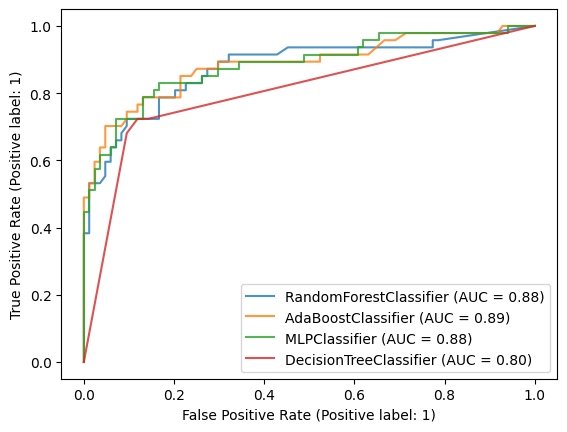

In [ ]:
ax = plt.gca()
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test, ax=ax, alpha=0.8)
abc_disp = RocCurveDisplay.from_estimator(abc, X_test, Y_test, ax=ax, alpha=0.8)
mlp_disp = RocCurveDisplay.from_estimator(mlp, X_test, Y_test, ax=ax, alpha=0.8)
dtf_disp.plot(ax=ax, alpha=0.8)
plt.show()

Выполним поиск оптимальных гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Ваш код
param_grid1 = {
    'n_estimators': [60,70,80,90,100,110],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid1, cv= 5)
CV_rf.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [60, 70, 80, 90, 100, 110]})

In [ ]:
CV_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'n_estimators': 90}

In [ ]:
CV_rf.best_score_

0.8692462928840923

In [ ]:
rf = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=4, max_features=None, n_estimators=90)
rf.fit(X_train,Y_train)
pred_2=rf.predict(X_test)

accuracy 0.8625954198473282
precision 0.8717948717948718
recall 0.723404255319149 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        84
           1       0.87      0.72      0.79        47

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.84       131
weighted avg       0.86      0.86      0.86       131
 

col_0      0   1
Survived        
0         79   5
1         13  34 



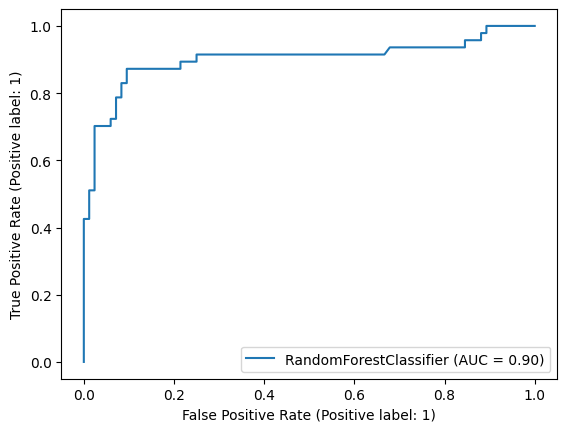

In [ ]:
print('accuracy',accuracy_score(Y_test,pred_2))
print('precision',precision_score(Y_test,pred_2))
print('recall',recall_score(Y_test,pred_2), '\n')
print(classification_report(Y_test,pred_2), '\n')
print(pd.crosstab(Y_test,pred_2), '\n')
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, Y_test)
plt.show()

In [ ]:
param_grid2 = {
    'n_estimators': [30,40,50,60,70,80,90,100,110],
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
    'random_state': [0,1,3,5,7,10]
}

CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid2, cv=12)
CV_abc.fit(X, Y)

GridSearchCV(cv=12, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100, 110],
                         'random_state': [0, 1, 3, 5, 7, 10]})

In [ ]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)

{'learning_rate': 1.0, 'n_estimators': 40, 'random_state': 0}
0.8608350322799864


In [ ]:
abc = AdaBoostClassifier(learning_rate=1.0, n_estimators=40, random_state=0)
abc.fit(X_train, Y_train)
pred3 = abc.predict(X_test)

accuracy 0.8625954198473282
precision 0.8717948717948718
recall 0.723404255319149 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        84
           1       0.87      0.72      0.79        47

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.84       131
weighted avg       0.86      0.86      0.86       131
 

col_0      0   1
Survived        
0         79   5
1         13  34 



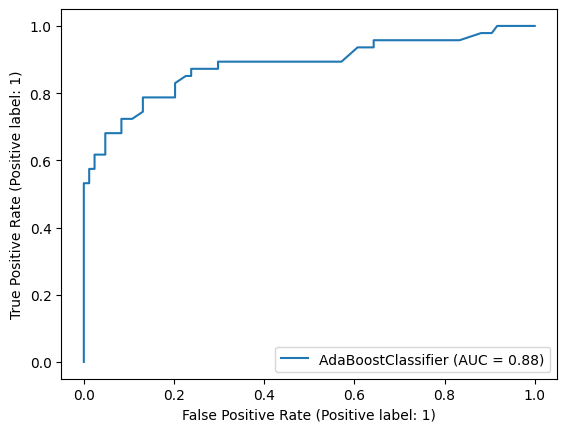

In [ ]:
print('accuracy',accuracy_score(Y_test,pred_3))
print('precision',precision_score(Y_test,pred_3))
print('recall',recall_score(Y_test,pred_3), '\n')
print(classification_report(Y_test,pred_3), '\n')
print(pd.crosstab(Y_test,pred_3), '\n')
abc_disp = RocCurveDisplay.from_estimator(abc, X_test, Y_test)
plt.show()

In [ ]:
param_grid3 = {
    'hidden_layer_sizes': [(50,),(75,),(100,)],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate': ['constant','invscaling','adaptive']
}

CV_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid3, cv=5)
CV_mlp.fit(X, Y)

In [ ]:
print(CV_mlp.best_params_)
print(CV_mlp.best_score_)

{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.8608230236027025


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', learning_rate='adaptive', solver='adam')
mlp.fit(X_train,Y_train)
pred_4=mlp.predict(X_test)

accuracy 0.8549618320610687
precision 0.85
recall 0.723404255319149 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        84
           1       0.85      0.72      0.78        47

    accuracy                           0.85       131
   macro avg       0.85      0.83      0.84       131
weighted avg       0.85      0.85      0.85       131
 

col_0      0   1
Survived        
0         78   6
1         13  34 



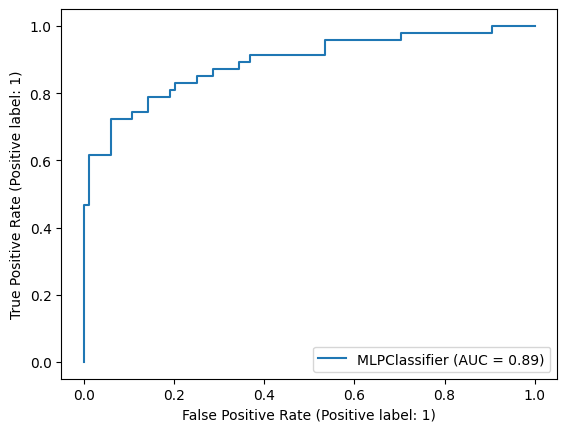

In [ ]:
print('accuracy',accuracy_score(Y_test,pred_4))
print('precision',precision_score(Y_test,pred_4))
print('recall',recall_score(Y_test,pred_4),'\n')
print(classification_report(Y_test,pred_4),'\n')
print(pd.crosstab(Y_test,pred_4),'\n')
mlp_disp = RocCurveDisplay.from_estimator(mlp, X_test, Y_test)
plt.show()

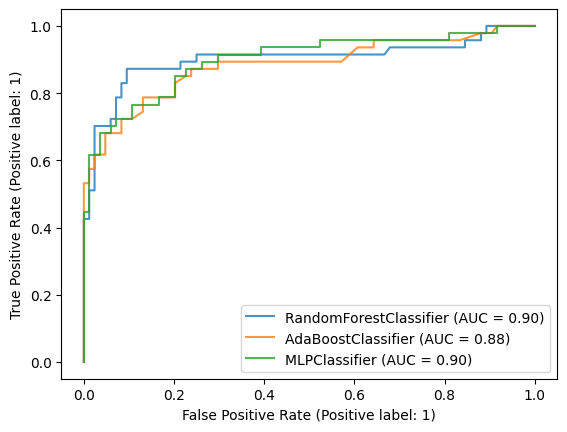

In [ ]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
abc_disp.plot(ax=ax, alpha=0.8)
mlp_disp.plot(ax=ax, alpha=0.8)
plt.show()

Обучите модели на полном наборе. Для тестирования используйте отдельный набор

In [ ]:
X_train_full = pd.concat([X_train, X_test])
Y_train_full = pd.concat([Y_train, Y_test])
Y_test_full = dft['Survived']
X_test_full = dft.drop(['Survived'],axis=1)

In [ ]:
rf.fit(X_train_full, Y_train_full)
pred_2=rf.predict(X_test_full)

accuracy 0.9880382775119617
precision 0.9932885906040269
recall 0.9736842105263158 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       0.99      0.97      0.98       152

    accuracy                           0.99       418
   macro avg       0.99      0.98      0.99       418
weighted avg       0.99      0.99      0.99       418
 

col_0       0    1
Survived          
0         265    1
1           4  148 



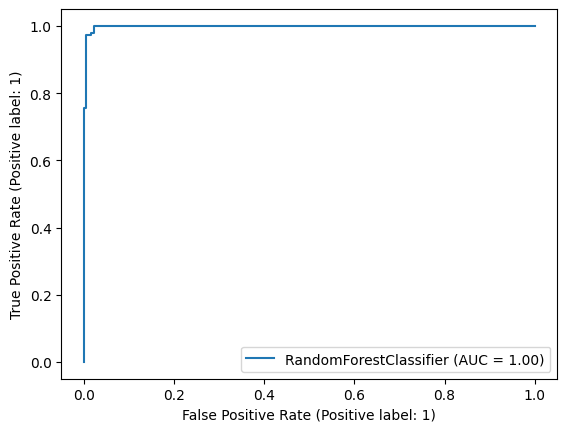

In [ ]:
print('accuracy',accuracy_score(Y_test_full,pred_2))
print('precision',precision_score(Y_test_full,pred_2))
print('recall',recall_score(Y_test_full,pred_2),'\n')
print(classification_report(Y_test_full,pred_2),'\n')
print(pd.crosstab(Y_test_full,pred_2),'\n')
rf_disp = RocCurveDisplay.from_estimator(rf, X_test_full, Y_test_full)
plt.show()

In [ ]:
abc.fit(X_train_full, Y_train_full)
pred_3=abc.predict(X_test_full)

accuracy 0.9856459330143541
precision 0.9866666666666667
recall 0.9736842105263158 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       266
           1       0.99      0.97      0.98       152

    accuracy                           0.99       418
   macro avg       0.99      0.98      0.98       418
weighted avg       0.99      0.99      0.99       418
 

col_0       0    1
Survived          
0         264    2
1           4  148 



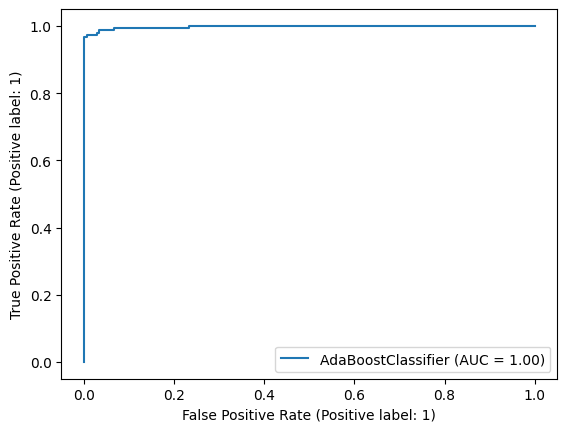

In [ ]:
print('accuracy',accuracy_score(Y_test_full,pred_3))
print('precision',precision_score(Y_test_full,pred_3))
print('recall',recall_score(Y_test_full,pred_3),'\n')
print(classification_report(Y_test_full,pred_3),'\n')
print(pd.crosstab(Y_test_full,pred_3),'\n')
abc_disp = RocCurveDisplay.from_estimator(abc, X_test_full, Y_test_full)
plt.show()

In [ ]:
mlp.fit(X_train_full, Y_train_full)
pred_4=mlp.predict(X_test_full)

accuracy 0.9856459330143541
precision 0.974025974025974
recall 0.9868421052631579 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       266
           1       0.97      0.99      0.98       152

    accuracy                           0.99       418
   macro avg       0.98      0.99      0.98       418
weighted avg       0.99      0.99      0.99       418
 

col_0       0    1
Survived          
0         262    4
1           2  150 



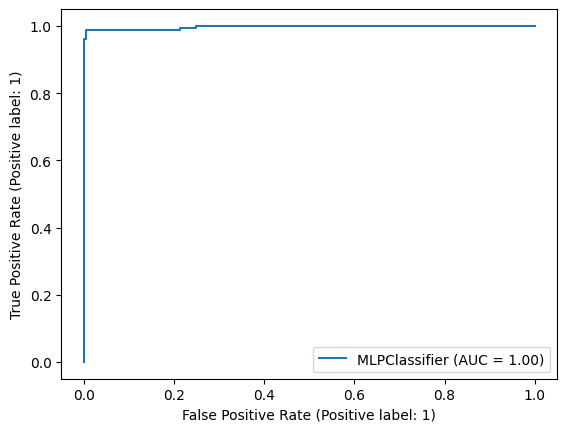

In [ ]:
print('accuracy',accuracy_score(Y_test_full,pred_4))
print('precision',precision_score(Y_test_full,pred_4))
print('recall',recall_score(Y_test_full,pred_4),'\n')
print(classification_report(Y_test_full,pred_4),'\n')
print(pd.crosstab(Y_test_full,pred_4),'\n')
mlp_disp = RocCurveDisplay.from_estimator(mlp, X_test_full, Y_test_full)
plt.show()

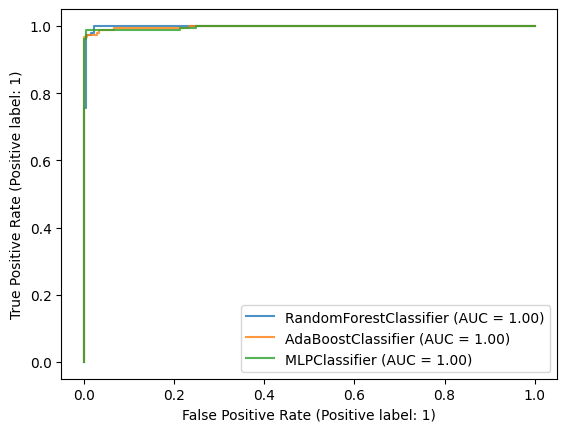

In [ ]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
abc_disp.plot(ax=ax, alpha=0.8)
mlp_disp.plot(ax=ax, alpha=0.8)
plt.show()

Уменьшите количество признаков (см. матрицу корреляции)
Постройте модели и проанализируйте результаты

In [ ]:
#ваш код
X_red = df.drop(columns=['Parch', 'Pclass', 'Survived'])
Y_red = df['Survived']
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(X_red, Y_red, test_size = 0.1, random_state=5)

In [ ]:
param_grid1 = {
    'n_estimators': [60,70,80,90,100,110],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy','log_loss']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid1, cv= 5)
CV_rf.fit(X_red, Y_red)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [60, 70, 80, 90, 100, 110]})

In [ ]:
print(CV_rf.best_params_)
print(CV_rf.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 60}
0.8669474423093796


In [ ]:
rf = RandomForestClassifier(random_state=0, criterion='gini', max_depth=5, max_features='sqrt', n_estimators=60)
rf.fit(X_train_red, Y_train_red)
pred_2=rf.predict(X_test_red)

accuracy 0.8625954198473282
precision 0.8717948717948718
recall 0.723404255319149 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        84
           1       0.87      0.72      0.79        47

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.84       131
weighted avg       0.86      0.86      0.86       131
 

col_0      0   1
Survived        
0         79   5
1         13  34 



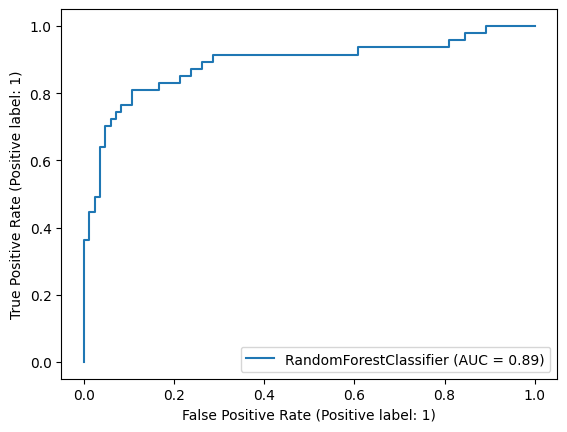

In [ ]:
print('accuracy',accuracy_score(Y_test_red,pred_2))
print('precision',precision_score(Y_test_red,pred_2))
print('recall',recall_score(Y_test_red,pred_2),'\n')
print(classification_report(Y_test_red,pred_2),'\n')
print(pd.crosstab(Y_test_red,pred_2),'\n')
rf_disp = RocCurveDisplay.from_estimator(rf, X_test_red, Y_test_red)
plt.show()

In [ ]:
param_grid2 = {
    'n_estimators': [30,40,50,60,70,80,90,100,110],
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
    'random_state': [0,1,3,5,7,10]
}

CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid2, cv=12)
CV_abc.fit(X_red, Y_red)

GridSearchCV(cv=12, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100, 110],
                         'random_state': [0, 1, 3, 5, 7, 10]})

In [ ]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)

{'learning_rate': 1.0, 'n_estimators': 110, 'random_state': 0}
0.8585414542983348


In [ ]:
abc = AdaBoostClassifier(learning_rate=1.0, n_estimators=110, random_state=0)
abc.fit(X_train_red, Y_train_red)
pred_3=abc.predict(X_test_red)

accuracy 0.8473282442748091
precision 0.8461538461538461
recall 0.7021276595744681 

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        84
           1       0.85      0.70      0.77        47

    accuracy                           0.85       131
   macro avg       0.85      0.82      0.83       131
weighted avg       0.85      0.85      0.84       131
 

col_0      0   1
Survived        
0         78   6
1         14  33 



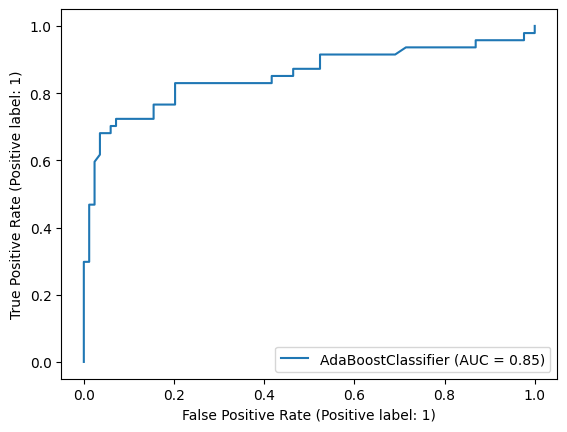

In [ ]:
print('accuracy',accuracy_score(Y_test_red,pred_3))
print('precision',precision_score(Y_test_red,pred_3))
print('recall',recall_score(Y_test_red,pred_3),'\n')
print(classification_report(Y_test_red,pred_3),'\n')
print(pd.crosstab(Y_test_red,pred_3),'\n')
abc_disp = RocCurveDisplay.from_estimator(abc, X_test_red, Y_test_red)
plt.show()

In [ ]:
param_grid3 = {
    'hidden_layer_sizes': [(50,),(75,),(100,)],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate': ['constant','invscaling','adaptive']
}

CV_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid3, cv=5)
CV_mlp.fit(X_red, Y_red)

In [ ]:
print(CV_mlp.best_params_)
print(CV_mlp.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (75,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.855470737913486


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(75,), activation='relu', learning_rate='adaptive', solver='adam')
mlp.fit(X_train_red, Y_train_red)
pred_4=mlp.predict(X_test_red)

accuracy 0.8473282442748091
precision 0.8292682926829268
recall 0.723404255319149 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        84
           1       0.83      0.72      0.77        47

    accuracy                           0.85       131
   macro avg       0.84      0.82      0.83       131
weighted avg       0.85      0.85      0.84       131
 

col_0      0   1
Survived        
0         77   7
1         13  34 



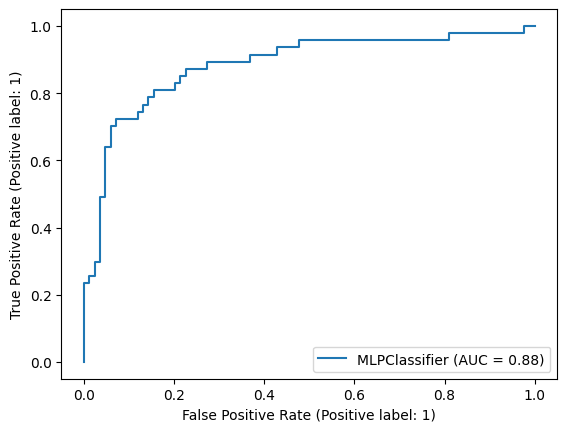

In [ ]:
print('accuracy',accuracy_score(Y_test_red,pred_4))
print('precision',precision_score(Y_test_red,pred_4))
print('recall',recall_score(Y_test_red,pred_4),'\n')
print(classification_report(Y_test_red,pred_4),'\n')
print(pd.crosstab(Y_test_red,pred_4),'\n')
mlp_disp = RocCurveDisplay.from_estimator(mlp, X_test_red, Y_test_red)
plt.show()

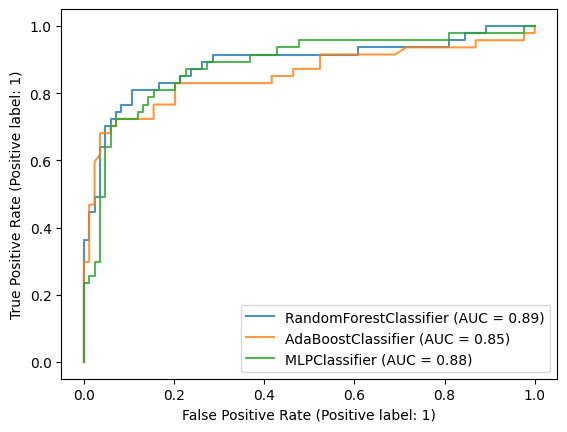

In [ ]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
abc_disp.plot(ax=ax, alpha=0.8)
mlp_disp.plot(ax=ax, alpha=0.8)
plt.show()

Увеличьте количество признаков
Постройте модели и проанализируйте результаты

In [ ]:
#ваш код
from sklearn.preprocessing import PolynomialFeatures, scale

X_inc = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
Y_inc = Y
X_train_inc, X_test_inc, Y_train_inc, Y_test_inc = train_test_split(X_inc, Y_inc, test_size = 0.1, random_state=5)

In [ ]:
param_grid1 = {
    'n_estimators': [70,80,90,100,110],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy','log_loss']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid1, cv= 5)
CV_rf.fit(X_inc, Y_inc)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [70, 80, 90, 100, 110]})

In [ ]:
print(CV_rf.best_params_)
print(CV_rf.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'n_estimators': 80}
0.8677108010880057


In [ ]:
rf = RandomForestClassifier(random_state=0, criterion='gini', max_depth=4, max_features=None, n_estimators=80)
rf.fit(X_train_inc, Y_train_inc)
pred_2=rf.predict(X_test_inc)

accuracy 0.8549618320610687
precision 0.868421052631579
recall 0.7021276595744681 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        84
           1       0.87      0.70      0.78        47

    accuracy                           0.85       131
   macro avg       0.86      0.82      0.83       131
weighted avg       0.86      0.85      0.85       131
 

col_0      0   1
Survived        
0         79   5
1         14  33 



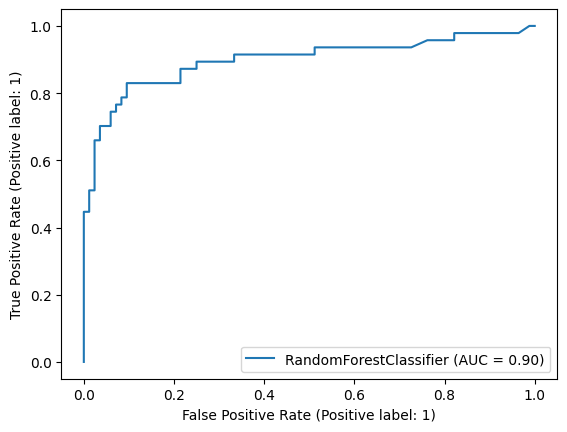

In [ ]:
print('accuracy',accuracy_score(Y_test_inc,pred_2))
print('precision',precision_score(Y_test_inc,pred_2))
print('recall',recall_score(Y_test_inc,pred_2),'\n')
print(classification_report(Y_test_inc,pred_2),'\n')
print(pd.crosstab(Y_test_inc,pred_2),'\n')
rf_disp = RocCurveDisplay.from_estimator(rf, X_test_inc, Y_test_inc)
plt.show()

In [ ]:
param_grid2 = {
    'n_estimators': [30,40,50,60,70],
    'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
    'random_state': [0,1,3,5,7]
}

CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid2, cv=12)
CV_abc.fit(X_inc, Y_inc)

GridSearchCV(cv=12, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [30, 40, 50, 60, 70],
                         'random_state': [0, 1, 3, 5, 7]})

In [ ]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)

{'learning_rate': 0.5, 'n_estimators': 40, 'random_state': 0}
0.8669724770642201


In [ ]:
abc = AdaBoostClassifier(learning_rate=0.5, n_estimators=40, random_state=0)
abc.fit(X_train_inc, Y_train_inc)
pred_3=abc.predict(X_test_inc)

accuracy 0.8625954198473282
precision 0.8717948717948718
recall 0.723404255319149 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        84
           1       0.87      0.72      0.79        47

    accuracy                           0.86       131
   macro avg       0.87      0.83      0.84       131
weighted avg       0.86      0.86      0.86       131
 

col_0      0   1
Survived        
0         79   5
1         13  34 



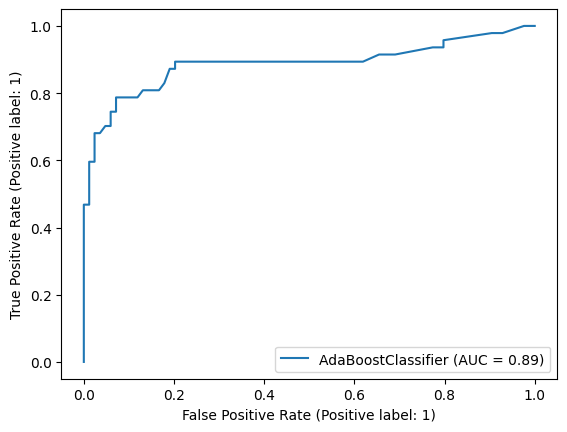

In [ ]:
print('accuracy',accuracy_score(Y_test_inc,pred_3))
print('precision',precision_score(Y_test_inc,pred_3))
print('recall',recall_score(Y_test_inc,pred_3),'\n')
print(classification_report(Y_test_inc,pred_3),'\n')
print(pd.crosstab(Y_test_inc,pred_3),'\n')
abc_disp = RocCurveDisplay.from_estimator(abc, X_test_inc, Y_test_inc)
plt.show()

In [ ]:
param_grid3 = {
    'hidden_layer_sizes': [(50,),(75,),(100,)],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate': ['constant','invscaling','adaptive']
}

CV_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid3, cv=5)
CV_mlp.fit(X_inc, Y_inc)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (75,), (100,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [ ]:
print(CV_mlp.best_params_)
print(CV_mlp.best_score_)

{'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.8646427422421106


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', learning_rate='adaptive', solver='sgd')
mlp.fit(X_train_inc, Y_train_inc)
pred_4=mlp.predict(X_test_inc)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy 0.8473282442748091
precision 0.8648648648648649
recall 0.6808510638297872 

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        84
           1       0.86      0.68      0.76        47

    accuracy                           0.85       131
   macro avg       0.85      0.81      0.82       131
weighted avg       0.85      0.85      0.84       131
 

col_0      0   1
Survived        
0         79   5
1         15  32 



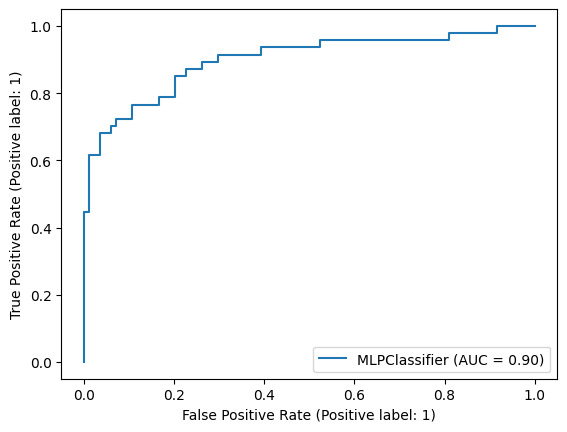

In [ ]:
print('accuracy',accuracy_score(Y_test_inc,pred_4))
print('precision',precision_score(Y_test_inc,pred_4))
print('recall',recall_score(Y_test_inc,pred_4),'\n')
print(classification_report(Y_test_inc,pred_4),'\n')
print(pd.crosstab(Y_test_inc,pred_4),'\n')
mlp_disp = RocCurveDisplay.from_estimator(mlp, X_test_inc, Y_test_inc)
plt.show()

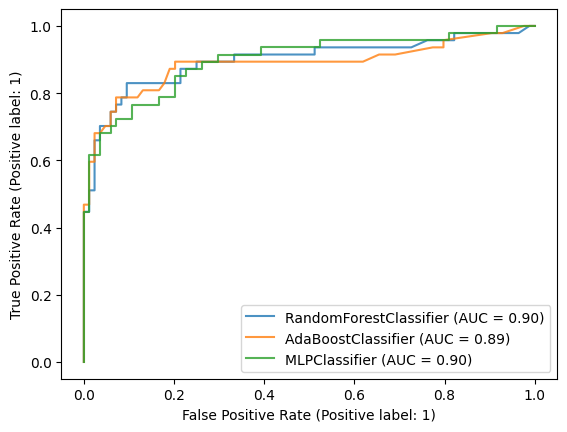

In [ ]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
abc_disp.plot(ax=ax, alpha=0.8)
mlp_disp.plot(ax=ax, alpha=0.8)
plt.show()